<img src="images/tictacufo.jpg"/>

# Practice notebook for multivariate analysis using NHANES data

### Setup
To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy import stats

pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe

In [2]:
da = pd.read_csv("data/nhanes_2015_2016.csv")

da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [3]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

### Question 1
**Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure (BPXDI1 and BPXDI2). Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.**

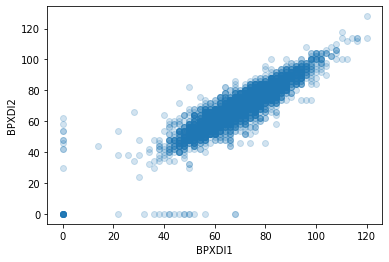

In [4]:
# Diastolic blood pressure (BPXDI1 and BPXDI2)

sns.regplot(x="BPXDI1", y="BPXDI2", data=da, fit_reg=False, scatter_kws={"alpha": 0.2})

C:\Users\Jack\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


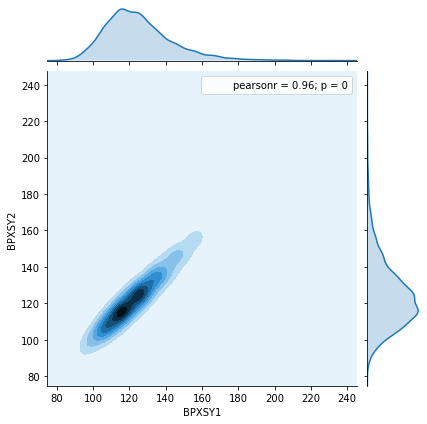

In [5]:
# Systolic blood pressure (BPXSY1 and BPXSY2)

sns.jointplot(x="BPXSY1", y="BPXSY2", kind='kde', data=da).annotate(stats.pearsonr)

C:\Users\Jack\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


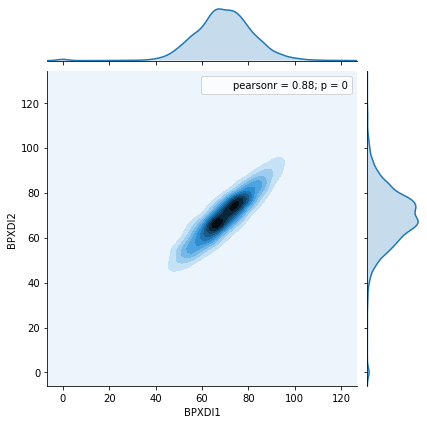

In [6]:
# Diastolic blood pressure (BPXDI1 and BPXDI2)

sns.jointplot(x="BPXDI1", y="BPXDI2", kind='kde', data=da).annotate(stats.pearsonr)

**Q1a. How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?**

Answer: Both have high correlation (R_Systolic = 0.96 and R_Diastolic = 0.88).

**Q1b. Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?**

Answer: The correlation is greater in Systolic Blood Pressure.

### Question 2
**Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement. Stratify the plots by gender (rows) and by race/ethnicity groups (columns).**

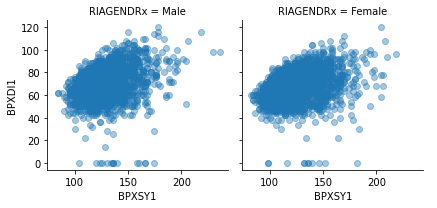

In [7]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

sns.FacetGrid(da, col="RIAGENDRx").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.4).add_legend()

In [8]:
print("Female")
print(da.loc[da.RIAGENDRx=="Female", ["BPXSY1", "BPXDI1"]].dropna().corr())
print()
print("Male")
print(da.loc[da.RIAGENDRx=="Male", ["BPXSY1", "BPXDI1"]].dropna().corr())

Female
          BPXSY1    BPXDI1
BPXSY1  1.000000  0.315968
BPXDI1  0.315968  1.000000

Male
          BPXSY1    BPXDI1
BPXSY1  1.000000  0.306176
BPXDI1  0.306176  1.000000


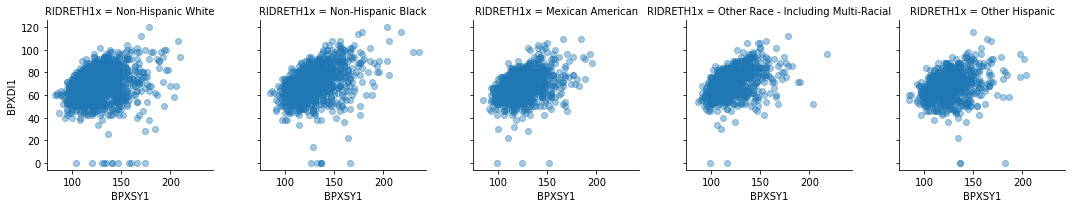

In [9]:
da["RIDRETH1x"] = da.RIDRETH1.replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White", 
                                       4: "Non-Hispanic Black", 5: "Other Race - Including Multi-Racial"})

sns.FacetGrid(da, col="RIDRETH1x").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.4).add_legend()

In [10]:
print("Mexican American")
print(da.loc[da.RIDRETH1x=="Mexican American", ["BPXSY1", "BPXDI1"]].dropna().corr())
print()
print()
print("Other Hispanic")
print(da.loc[da.RIDRETH1x=="Other Hispanic", ["BPXSY1", "BPXDI1"]].dropna().corr())
print()
print()
print("Non-Hispanic White")
print(da.loc[da.RIDRETH1x=="Non-Hispanic White", ["BPXSY1", "BPXDI1"]].dropna().corr())
print()
print()
print("Non-Hispanic Black")
print(da.loc[da.RIDRETH1x=="Non-Hispanic Black", ["BPXSY1", "BPXDI1"]].dropna().corr())
print()
print()
print("Other Race - Including Multi-Racial")
print(da.loc[da.RIDRETH1x=="Other Race - Including Multi-Racial", ["BPXSY1", "BPXDI1"]].dropna().corr())

Mexican American
          BPXSY1    BPXDI1
BPXSY1  1.000000  0.340169
BPXDI1  0.340169  1.000000


Other Hispanic
          BPXSY1    BPXDI1
BPXSY1  1.000000  0.267655
BPXDI1  0.267655  1.000000


Non-Hispanic White
          BPXSY1    BPXDI1
BPXSY1  1.000000  0.225532
BPXDI1  0.225532  1.000000


Non-Hispanic Black
          BPXSY1    BPXDI1
BPXSY1  1.000000  0.407291
BPXDI1  0.407291  1.000000


Other Race - Including Multi-Racial
          BPXSY1    BPXDI1
BPXSY1  1.000000  0.415003
BPXDI1  0.415003  1.000000


**Q2a. Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.**

Answer: Regarding gender, there is no correlation (R ~ 0.25). With regard to ethnicity, there is no correlation (R ~ 0.25), with a slight emphasis on the groups 'Non-Hispanic Black' and 'Other Race - Including Multi-Racial' with a very low correlation (R ~ 0.41).

### Question 3
**Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.**

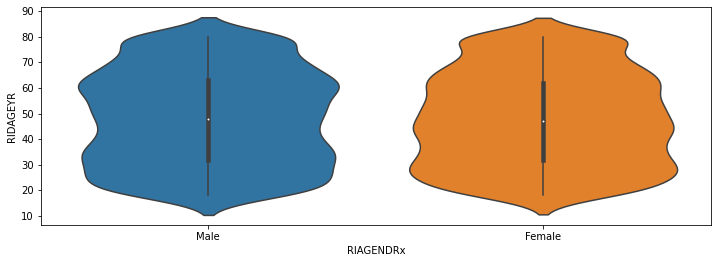

In [11]:
plt.figure(figsize=(12, 4))
a = sns.violinplot(da.RIAGENDRx, da.RIDAGEYR)

In [12]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "Less than 9th grade", 2: "9-11th grade", 3: "High school graduate/GED", 
                                       4: "Some college or AA degree", 5: "College graduate or above", 
                                       7: "Refused", 9: "Don't Know"})

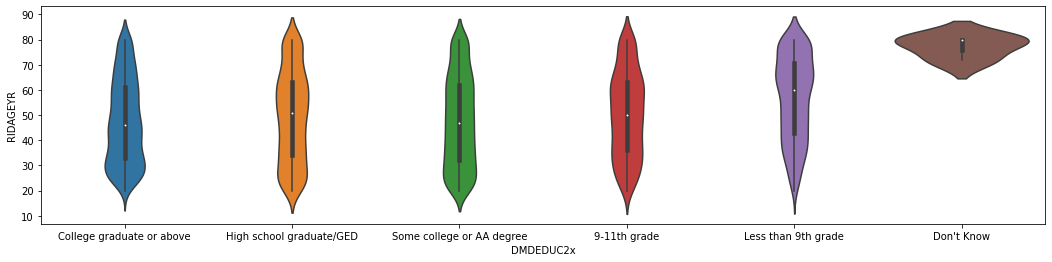

In [13]:
plt.figure(figsize=(18, 4))
b = sns.violinplot(da.DMDEDUC2x, da.RIDAGEYR)

**Q3a. Comment on any evident differences among the age distributions in the different demographic groups.**

Answer: The age-by-gender graphs show that the survey was conducted with approximately the same distribution for both sexes, ensuring a good quality of the survey as a whole. Regarding the age and education charts, people with advanced age who do not know the degree of their own education are noteworthy.

### Question 4
Use violin plots to compare the distributions of BMI within a series of 10-year age bands. Also stratify these plots by gender.

In [14]:
# Create a new column with 10-year age bands

conditions = [(da['RIDAGEYR'] > 9) & (da['RIDAGEYR'] < 20), 
              (da['RIDAGEYR'] > 19) & (da['RIDAGEYR'] < 30),
              (da['RIDAGEYR'] > 29) & (da['RIDAGEYR'] < 40),
              (da['RIDAGEYR'] > 39) & (da['RIDAGEYR'] < 50),
              (da['RIDAGEYR'] > 49) & (da['RIDAGEYR'] < 60),
              (da['RIDAGEYR'] > 59) & (da['RIDAGEYR'] < 70),
              (da['RIDAGEYR'] > 69) & (da['RIDAGEYR'] < 80),
              (da['RIDAGEYR'] > 79) & (da['RIDAGEYR'] < 90)]

values = ["Until 19","20's'", "30's", "40's", "50's", "60's", "70's", "80's"]

da['RIDAGEYRx'] = np.select(conditions, values)

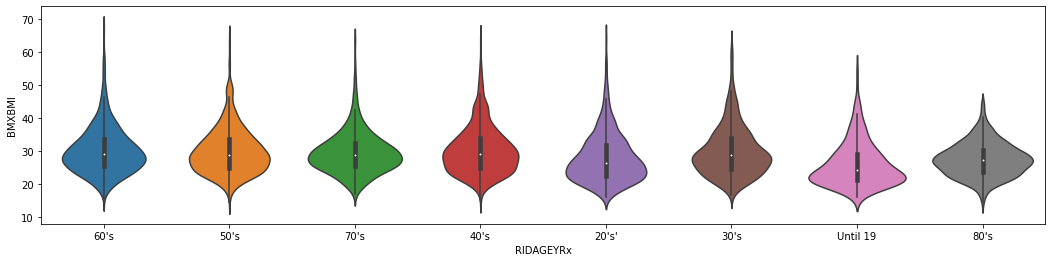

In [15]:
plt.figure(figsize=(18, 4))
b = sns.violinplot(da.RIDAGEYRx, da.BMXBMI)

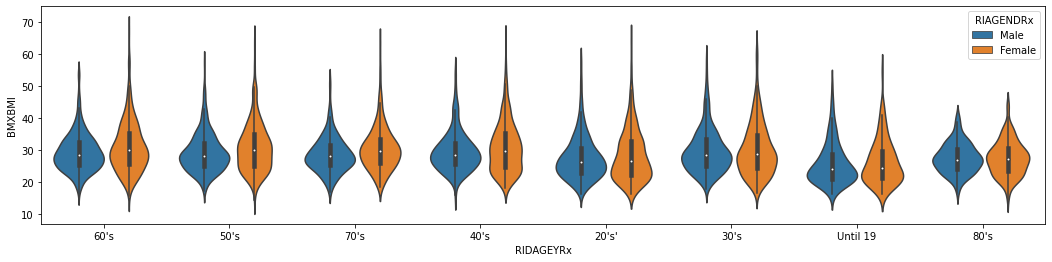

In [16]:
plt.figure(figsize=(18, 4))
c = sns.violinplot(x = da.RIDAGEYRx, y = da.BMXBMI, hue = da.RIAGENDRx)

**Q4a. Comment on the trends in BMI across the demographic groups.**

Answer: Just as ages, the graphs show a very similar distribution, with a slight emphasis on up to 19 years old and for people in their 80s, body mass indexes have a very similar distribution. When we analyze the distribution with the separation by gender, we notice a greater difference in the distribution.

### Question 5
**Construct a frequency table for the joint distribution of ethnicity groups (RIDRETH1) and health-insurance status (HIQ210). Normalize the results so that the values within each ethnic group are proportions that sum to 1.**

In [17]:
FT = pd.crosstab(da.RIDRETH1, da.HIQ210).apply(lambda x: x/x.sum(), axis=1)
FT

HIQ210,1.0,2.0,9.0
RIDRETH1,,,
1,0.137982,0.857567,0.004451
2,0.128696,0.871304,0.000000
3,0.067354,0.931432,0.001214
4,0.108654,0.890385,0.000962
5,0.081761,0.915723,0.002516


**Q6a. Which ethnic group has the highest rate of being uninsured in the past year?**

    HIQ210 table: (1: Yes, 2: No, 9: Don't know)
               
    RIDRETH1 table: (1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White", 
                     4: "Non-Hispanic Black", 5: "Other Race - Including Multi-Racial")

Answer: "Non-Hispanic White".